In [43]:
import pandas as pd
import numpy as np
balls=pd.read_csv("deliveries.csv")
balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [44]:
print(balls.shape)
print(" ------------------ ")
print(balls.isnull().sum())
print(" ------------------ ")
print(balls.info())

(260920, 17)
 ------------------ 
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64
 ------------------ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non

In [45]:
balls.drop(['batter','bowler','non_striker','batsman_runs','extra_runs','extras_type','player_dismissed','dismissal_kind','fielder'],axis = 1,inplace = True)
balls = balls.rename(columns={'match_id': 'id'})
print(balls.isnull().sum())

id              0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
total_runs      0
is_wicket       0
dtype: int64


In [46]:
balls['batting_team'] = balls['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['bowling_team'] = balls['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')

balls['batting_team'] = balls['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['bowling_team'] = balls['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')

balls['batting_team'] = balls['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['bowling_team'] = balls['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

balls['batting_team'] = balls['batting_team'].str.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
balls['bowling_team'] = balls['bowling_team'].str.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

balls['batting_team'] = balls['batting_team'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['bowling_team'] = balls['bowling_team'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

balls['batting_team'] = balls['batting_team'].str.replace('Gujarat Lions', 'Gujarat Titans')
balls['bowling_team'] = balls['bowling_team'].str.replace('Gujarat Lions', 'Gujarat Titans')

balls['batting_team'] = balls['batting_team'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
balls['bowling_team'] = balls['bowling_team'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

balls['batting_team'] = balls['batting_team'].str.replace('Pune Warriorsss', 'Pune Warriors')
balls['bowling_team'] = balls['bowling_team'].str.replace('Pune Warriorsss', 'Pune Warriors')

balls['batting_team'] = balls['batting_team'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['bowling_team'] = balls['bowling_team'].str.replace('Pune Warriorss', 'Pune Warriors')

balls['bowling_team'].unique()

array(['Royal Challengers Bengaluru', 'Kolkata Knight Riders',
       'Punjab Kings', 'Chennai Super Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [47]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [48]:
print(matches.shape)
print(" -------------------- ")
print(matches.isnull().sum())
print(" -------------------- ")
print(matches.info())

(1095, 20)
 -------------------- 
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match 

In [49]:
matches.drop(['city','method','umpire1','umpire2','season','player_of_match','toss_winner','toss_decision','result','result_margin','target_runs','target_overs','super_over'],axis=1,inplace=True,errors="ignore")
matches= matches.dropna()
print(matches.isnull().sum())

id            0
date          0
match_type    0
venue         0
team1         0
team2         0
winner        0
dtype: int64


In [50]:
matches['winner'] = matches['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['winner'] = matches['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['winner'] = matches['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['winner'] = matches['winner'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['winner'] = matches['winner'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [51]:
stadium_aliases = {
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala':'Himachal Pradesh Cricket Association Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh':'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Vidarbha Cricket Association Stadium, Jamtha':'Vidarbha Cricket Association Stadium',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow':'Ekana Cricket Stadium',
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur':'Maharaja Yadavindra Singh Cricket Stadium'
}
matches['venue'] = matches['venue'].replace(stadium_aliases)
matches['venue'].unique()

array(['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International

In [52]:
c={
   'Elimination Final':'Eliminator',
    '3rd Place Play-Off':'Eliminator'
}
matches['match_type'] = matches['match_type'].replace(c)
matches['match_type'].unique()

array(['League', 'Semi Final', 'Final', 'Eliminator', 'Qualifier 1',
       'Qualifier 2'], dtype=object)

In [53]:
merged_df = pd.merge(matches, balls, on='id')

In [54]:
merged_df.drop(['id','team1','team2','date'],axis =1,inplace = True)

In [55]:
merged_df = merged_df[['batting_team','bowling_team', 'venue','over', 'ball','inning','match_type','total_runs', 'is_wicket','winner']]
merged_df.columns

Index(['batting_team', 'bowling_team', 'venue', 'over', 'ball', 'inning',
       'match_type', 'total_runs', 'is_wicket', 'winner'],
      dtype='object')

In [56]:
team = {team: idx + 1 for idx, team in enumerate(sorted(merged_df['batting_team'].unique()))}
mtype = {mtype: idx + 1 for idx, mtype in enumerate(sorted(merged_df['match_type'].unique()))}
venue = {venue: idx + 1 for idx, venue in enumerate(sorted(merged_df['venue'].unique()))}
mtype

{'Eliminator': 1,
 'Final': 2,
 'League': 3,
 'Qualifier 1': 4,
 'Qualifier 2': 5,
 'Semi Final': 6}

In [57]:
pd.set_option('future.no_silent_downcasting', True)
merged_df['batting_team'] = merged_df['batting_team'].replace(team)
merged_df['bowling_team'] = merged_df['bowling_team'].replace(team)
merged_df['winner'] = merged_df['winner'].replace(team)
merged_df['venue'] = merged_df['venue'].replace(venue)
merged_df['match_type'] = merged_df['match_type'].replace(mtype)
merged_df['winner'].unique()

array([5, 1, 2, 11, 10, 9, 12, 7, 8, 4, 3, 6], dtype=object)

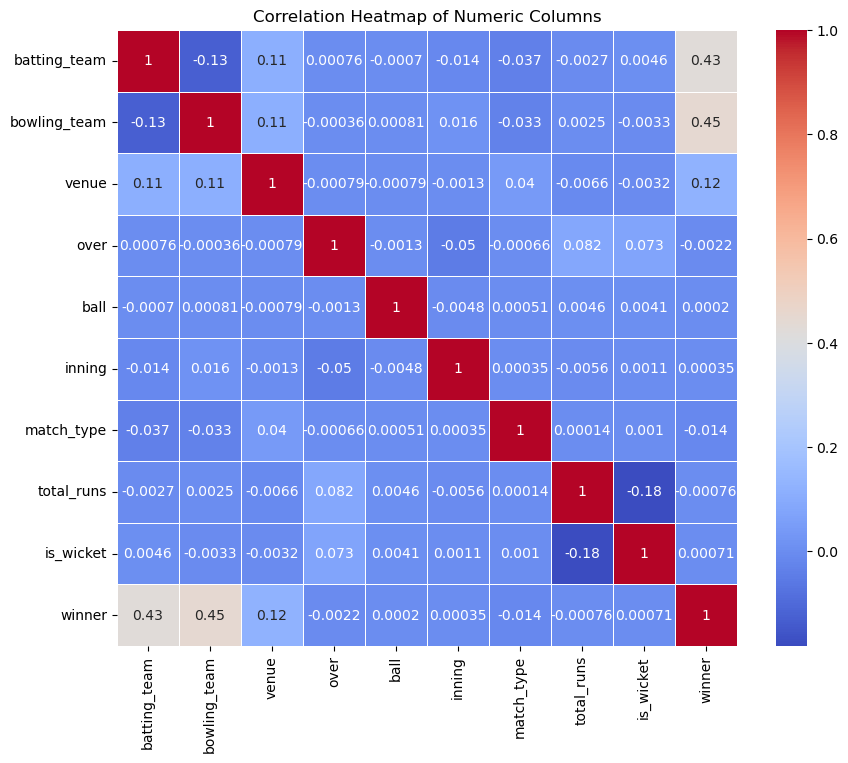

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8)) 
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [59]:
merged_df['runs'] = 0
merged_df['wickets'] = 0

for inning in merged_df['inning'].unique():
    inning_data = merged_df[merged_df['inning'] == inning]
    runs = 0
    wickets = 0
    
    for index, row in inning_data.iterrows():
        if row['over'] == 0 and row['ball'] == 1:  # First ball of the first over
            runs = 0  
            wickets = 0 
        
        runs += row['total_runs']
        wickets += row['is_wicket']
        
        merged_df.loc[index, 'runs'] = runs
        merged_df.loc[index, 'wickets'] = wickets

print(merged_df[['over', 'ball', 'inning', 'total_runs', 'is_wicket', 'runs', 'wickets']])


        over  ball  inning  total_runs  is_wicket  runs  wickets
0          0     1       1           1          0     1        0
1          0     2       1           0          0     1        0
2          0     3       1           1          0     2        0
3          0     4       1           0          0     2        0
4          0     5       1           0          0     2        0
...      ...   ...     ...         ...        ...   ...      ...
260425     9     5       2           1          0   110        2
260426     9     6       2           1          0   111        2
260427    10     1       2           1          0   112        2
260428    10     2       2           1          0   113        2
260429    10     3       2           1          0   114        2

[260430 rows x 7 columns]


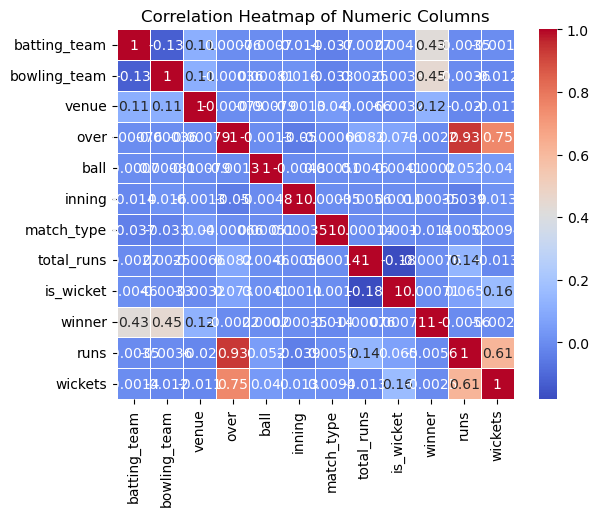

In [60]:
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [61]:
merged_df = merged_df[['over','ball','batting_team','bowling_team','venue','inning','match_type','total_runs', 'is_wicket','runs','wickets','winner']]
merged_df.to_csv('data1.csv')

In [ ]:
print(team